# 1. First render

## Overview

This very first tutorial will guide you through an easy installation of the Mitsuba 2 framework and show you how to render you very first image!

<div class="alert alert-block alert-info">
    
✔️ **What will you learn?**
    
<ul>
  <li>(UPCOMING) Install mitsuba using pip install</li>
  <li>Load a scene from disk</li>
  <li>Render a scene</li>
  <li>Write a rendered image to disk</li>
</ul>
    
</div>

### Step 1 - install mitsuba and drjit

Before getting our hands dirty, we need to install the mitsuba and drjit libraries in our python environnement if it is not already done. While it is possible to build the framework from the source code (see [documentation](../src/getting_started/compilation.rst)), we recommand to use `pip` for an easier installation:

```
pip3 install mitsuba2
```

<div class="alert alert-block alert-danger">
⚠️ Unfortunately, it is not yet possible to install the mitsuba2 library using pip install. 
You will need to build the framework manually in the meantime. (see doc)
</div>

### Step 2 - choose your variant

Now that the framework was successfully installed, let's dive in and render our first image. As with all Python packages, the first thing to do is to import the libraries.

In [1]:
# Add mitsuba and drjit to PATH 
# (this shouldn't be necessary if you properly ran `source build/setpath.sh` before launching this notebook)
import sys
sys.path.append('../../build/python')

In [2]:
import drjit as dr
import mitsuba as mi

We use the short alias `dr` for `drjit` as it will be used frequently in our scripts. Conviniently, the drjit API is very similar to the numpy API, and translating snippets of code from one framework to the other is often as easy as replacing the library suffix `np <--> dr`.

Mitsuba is a *retargetable* system, meaning that it is possible to choose between different flavour of computational backends (e.g. CPU vs GPU), and change other aspects of the renderer (e.g. RGB vs spectral rendering, single vs double precision, etc...). Without going further into the details here, what's important to take away from this is that it is necessary to tell the system which *variant* of the renderer should be enabled before doing anything else.

This can be achieved using the `mi.set_variant('variant_name')` routine. For more information on this subject, please refer to the [dedicated section](../src/getting_started/variants.rst) in the doc.

For this tutorial, we are going to stick with the simplest of the variant: `scalar_rgb`. As the name implies, computations will be performed in a scalar-fashion (e.g. non-vectorized code running on the CPU) and the light transport simulation will operate on RGB color values. As we will see in further tutorials, switching to a different variant of the system (e.g. GPU) should be possible by simply setting a different variant name here.

In [3]:
mi.set_variant('scalar_rgb')

### Step 3 - loading a scene from disk

Now that the framework is properly setup, we can get started! 🚀

In this tutorial, we are going to load a Mitsuba scene from a file on disk. Mitsuba scenes are described using a simple and general XML-based format as explained in the [documentation](../src/getting_started/file_format.rst).

Luckily for us, a few scenes were already provided during the installation. In order to load a scene, we are going to use the [<code>mitsuba.load_file</code>][1] function to which we are going to pass the file name of our XML scene.


[1]: https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html?highlight=load_file#mitsuba.core.load_file

In [4]:
scene = mi.load_file('../scenes/cbox.xml')

2022-02-14 16:21:05 INFO main [xml.cpp:1260] Loading XML file "../scenes/cbox.xml" with variant "scalar_rgb"..

2022-02-14 16:21:05 INFO main [Scene] Embree ready. (took 14ms)

2022-02-14 16:21:05 INFO main [xml.cpp:1319] Done loading XML file "../scenes/cbox.xml" (took 43ms).

### Step 4 - render the scene

With the scene loaded, we are now ready to perform our first rendering!

In [9]:
image = mi.render(scene, spp=128)

2022-02-14 16:21:41 INFO main [SamplingIntegrator] Starting render job (256x256, 128 samples, 32 threads)

2022-02-14 16:21:41 INFO main [SamplingIntegrator] Rendering finished. (took 600ms)

### Step 5 - write image to file

This rendering routine returns a [<code>mitsuba.Bitmap</code>][mitsuba.Bitmap] object. It is then straightforward to write this image down to disk using the `write()` method.


[mitsuba.core.Bitmap]: https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html?highlight=Bitmap#mitsuba.core.Bitmap

In [10]:
bmp = mi.Bitmap(image)
bmp.write('my_first_rendering.exr')

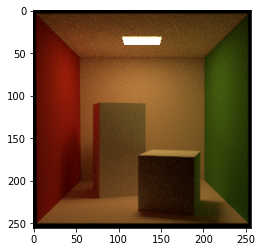

In [15]:
import matplotlib.pyplot as plt
plt.imshow(bmp)

It is also possible to write a PNG image file, but for this we first need to convert our bitmap to make sure it has the right pixel and component format.

In [12]:
bmp = bmp.convert(mi.Bitmap.PixelFormat.RGB, mi.Struct.Type.UInt8, srgb_gamma=True)
bmp.write('my_first_rendering.png')

We can then easily display the rendered image in this notebook

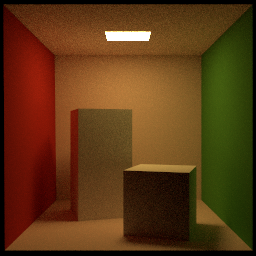

In [13]:
from IPython.display import Image
Image('my_first_rendering.png')

🎉 !! And BRAVO !! 🎉

You have now successfully installed Mitsuba on your system and performed your first render!

### *Reference API*

- [<code>mitsuba.set_variant</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.set_variant)
- [<code>mitsuba.load_file</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.load_file)
- [<code>mitsuba.render</code>](https://mitsuba2.readthedocs.io/en/latest/generated/python_api.html#mitsuba.python.util.render)
- [<code>mitsuba.Bitmap.write</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.Bitmap.write)